In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Box-Constrained Quadratic Methods

A general quadratic optimization problem subject to linear constraints i.e., equality and inequality constraints, can be written as:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Gx \leq h \\ & Ax = b
    \end{aligned}
\end{equation}
$$

For what about its usage in machine learning i.e., for training support vector machines, we are interested in a special case of this problem where the inequality constraints are expressed as box-constraints:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & Ax = b \\ & lb \leq x \leq ub
    \end{aligned}
\end{equation}
$$

where the equality vector $b$ and the lower bound $lb$ are vectors of all ones.

Now, since we can't hope to train a large SVM trough a QP solver to minimize the problem seen so far, we will need to use methods that use small working sets e.g., *Sequential Minimal Optimization*, or to consider the *Lagrangian Dual Relaxation* of the equality constraints which leads us to consider the problem as a generic quadratic box-constrained optimization problem defined as follow:

$$
\begin{equation}
    \begin{aligned}
        \min_x \quad & \frac{1}{2}x^T Q x + q^T x \\
            \textrm{subject to} \quad & lb \leq x \leq ub
    \end{aligned}
\end{equation}
$$

where the lower bound $lb$ is a vector of all ones.

In [2]:
from optiml.optimization import Quadratic
from optiml.optimization.constrained import *
from optiml.optimization.utils import generate_box_constrained_quadratic_function, plot_trajectory_optimization

In [3]:
Q, q, ub = generate_box_constrained_quadratic_function(ndim=2)
quad = Quadratic(Q, q)

## Projected Gradient

iter	cost		gnorm
   0	8.7346e+01	2.0557e+01
   1	5.5928e+00	1.7778e+00
   2	-8.0195e-15	0.0000e+00

[ 0.0000000e+00 -8.8817842e-16]


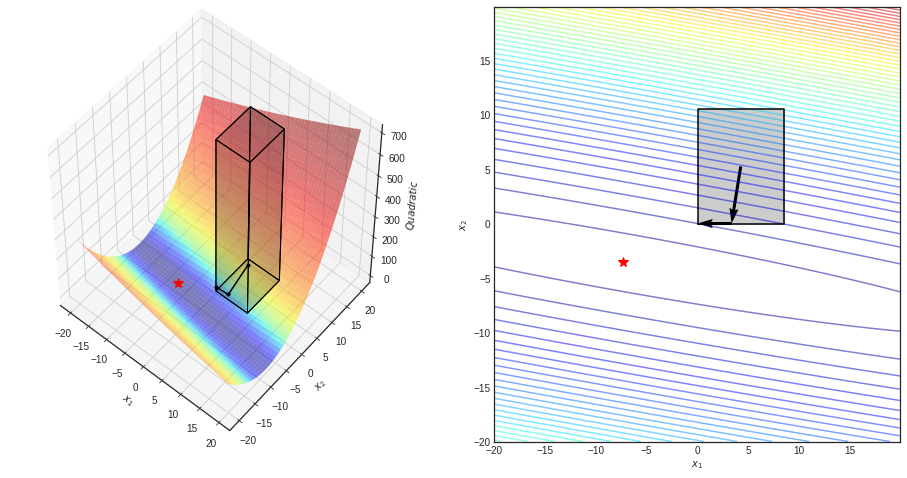

In [14]:
opt = ProjectedGradient(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Frank-Wolfe or Conditional Gradient

iter	cost		lb		gap
   0	8.7346e+01	-3.3431e+01	1.3827e+00

[0. 0.]


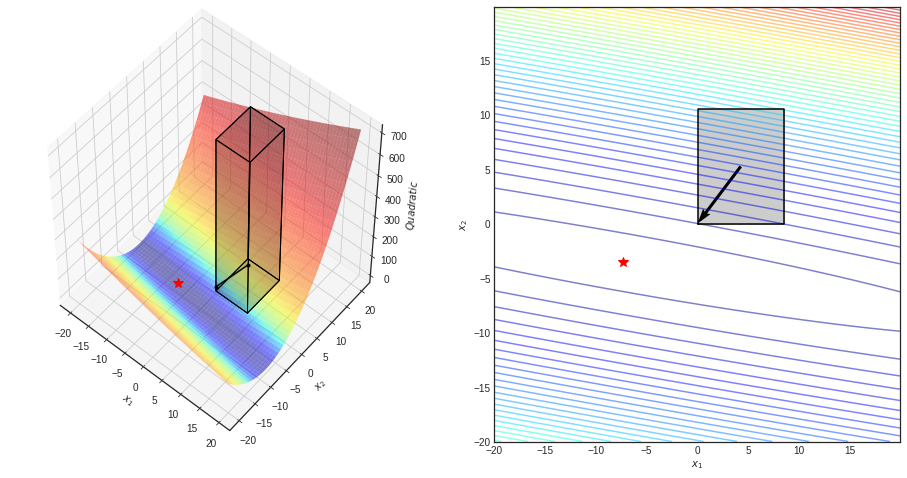

In [15]:
opt = FrankWolfe(f=quad, ub=ub, verbose=50).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Active Set

iter	cost		|B|	I/O
   0	8.7346e+01	0	I 1+0
   1	8.6282e+01	1	I 1+0
   2	0.0000e+00	2	

[0. 0.]


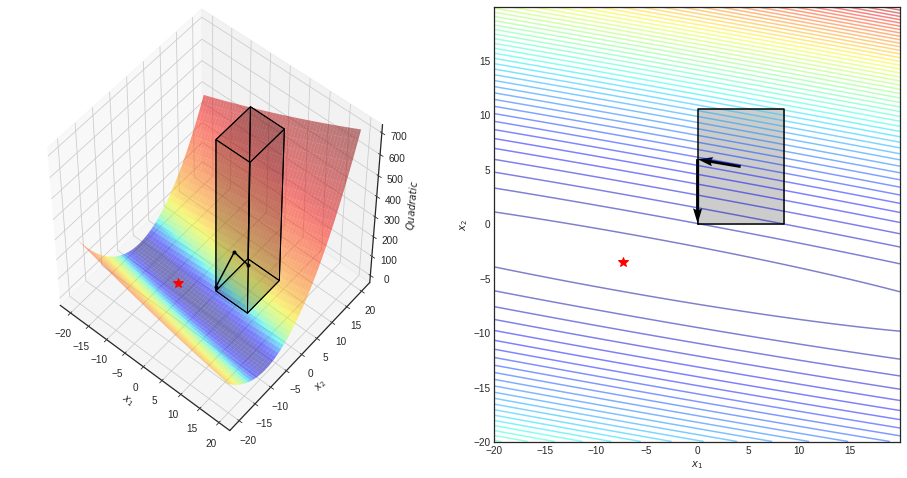

In [16]:
opt = ActiveSet(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Interior Point

iter	cost		p		gap
   0	8.7346e+01	-3.3431e+01	1.3827e+00
   1	3.2101e-01	-4.6632e+01	4.6953e+01
   2	4.1630e+00	-1.7796e+00	1.4275e+00
   3	3.0530e-01	-4.8745e-01	7.9275e-01
   4	7.4625e-02	-5.4117e-02	1.2874e-01
   5	6.0758e-03	-9.4742e-03	1.5550e-02
   6	1.4698e-03	-1.0808e-03	2.5506e-03
   7	1.2020e-04	-1.8729e-04	3.0749e-04
   8	2.9067e-05	-2.1380e-05	5.0447e-05
   9	2.3773e-06	-3.7040e-06	6.0813e-06
  10	5.7487e-07	-4.2284e-07	9.9771e-07
  11	4.7016e-08	-7.3256e-08	1.2027e-07
  12	1.1369e-08	-8.3627e-09	1.9732e-08
  13	9.2986e-10	-1.4488e-09	2.3787e-09
  14	2.2486e-10	-1.6539e-10	3.9025e-10
  15	1.8390e-11	-2.8654e-11	4.7044e-11

[1.16568056e-11 9.14949472e-15]


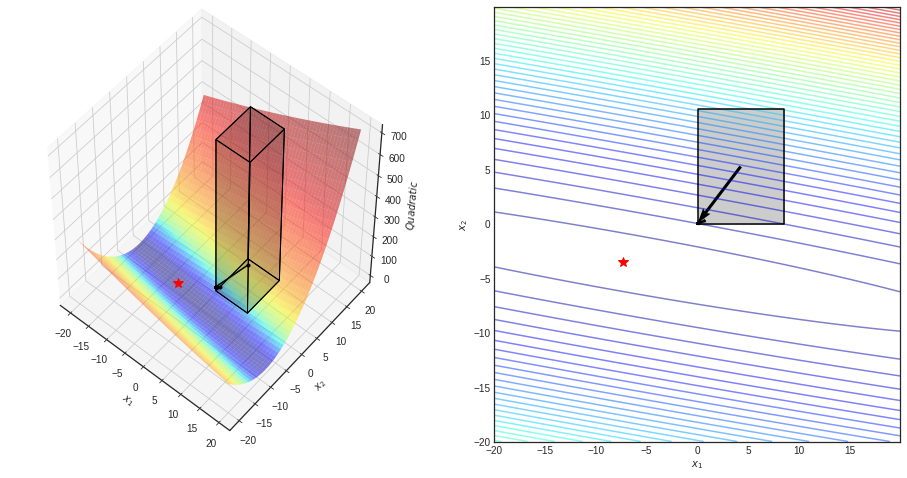

In [17]:
opt = InteriorPoint(f=quad, ub=ub, verbose=True).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)

## Lagrangian Dual Relaxation

In [10]:
import numpy as np

from optiml.optimization.unconstrained.line_search import SteepestGradientDescent

iter	feval	cost		gnorm		ls	it	astar
   0	   1	-2.9562e+02	1.2571e+01	 1	11	1.7138e-01
  10	  82	-1.6078e+02	1.2514e+01	 1	 2	1.7138e-01
  20	 119	-2.7044e+01	1.2468e+01	 1	10	1.7139e-01
  30	 178	1.0580e+02	1.2431e+01	 1	 2	1.7140e-01
  40	 259	2.3793e+02	1.2401e+01	 1	 2	1.7140e-01
  50	 319	3.6948e+02	1.2376e+01	 1	 2	1.7141e-01
  60	 380	5.0055e+02	1.2356e+01	 1	13	1.7141e-01
  70	 496	6.3125e+02	1.2340e+01	 1	16	1.7142e-01

[-53.56598582 -56.60552326 -34.63105955 -47.16826793]


AttributeError: 'SteepestGradientDescent' object has no attribute 'x0_history'

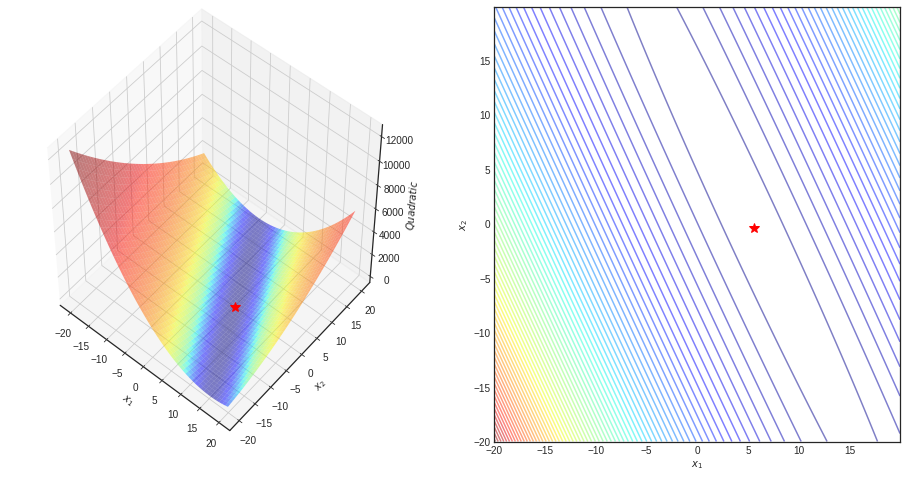

In [12]:
dual = LagrangianBoxConstrainedQuadraticRelaxation(quad=quad, ub=ub)
opt = SteepestGradientDescent(f=dual, x=np.zeros(dual.ndim), verbose=10).minimize()
print(opt.x)
plot_trajectory_optimization(quad, opt, x_min=-20, x_max=20, y_min=-20, y_max=20)